In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
from SBR import sosf,acf,ps,sosfnorm,sosfw,sosfw2,sosfs,sosfnorms

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

In [2]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
lr=[6562.8,6548,6583,6717,6731]#AngstromsR
#lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=65
max0=145

In [3]:
inputf='604.Isis.WHT.Red.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [4]:
for i in range(1):
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lr[Nx])/lr[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataI'+str(int(lr[Nx]))+'.csv')

In [5]:
datap='dataI6562.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,600.000000,600.000000,600.000000,600.000000
mean,105.269000,9.390000,-250.043594,2277.239467
std,23.243169,6.256047,10.420092,3750.107456
min,65.710000,0.000000,-277.593319,27.150000
25%,85.485000,4.000000,-257.836471,281.925000
50%,105.270000,9.000000,-249.888052,1017.500000
75%,125.045000,15.000000,-244.018098,2403.500000
max,144.830000,19.600000,-205.463695,30960.000000


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


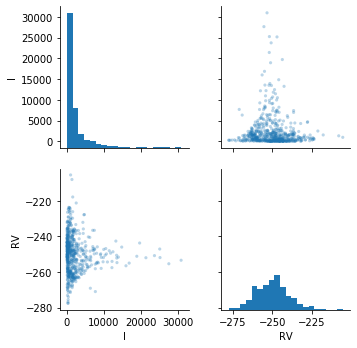

In [6]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


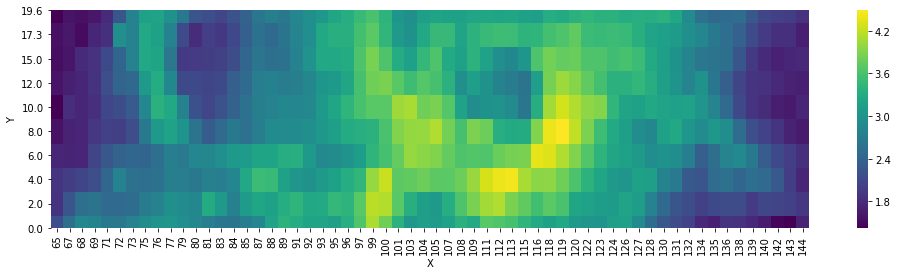

In [7]:
datal=dt.copy()
datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
#datal.Y=datal.Y.astype(int)

dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataH_f, cmap="viridis",xticklabels='auto')
plt.gca().invert_yaxis()
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="16"

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


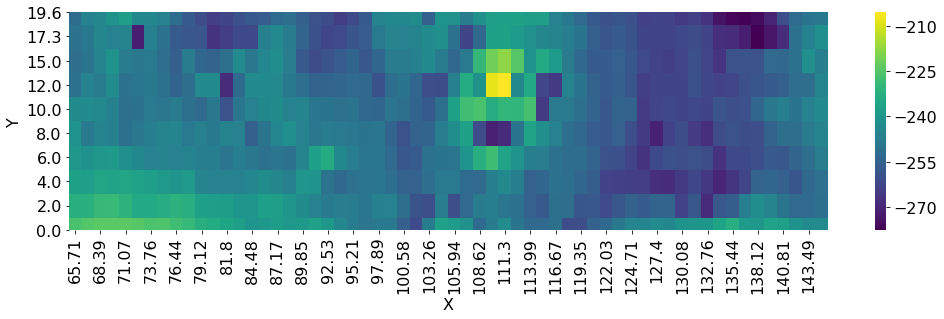

In [8]:
datal=dt.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

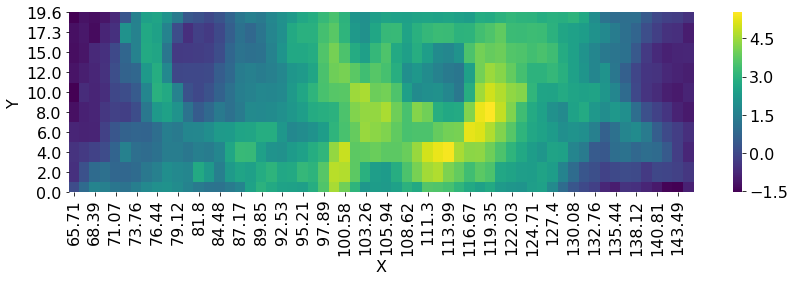

In [9]:
W=np.log(abs((dt.RV*dt.I)/dt.I.max()))
dtW=[dt.X,dt.Y,W]
dtW=pd.DataFrame(dtW).T
dtW.columns=['X','Y','W']

dtH_W=(dtW.round(2)).pivot(index='Y', columns='X', values='W')
fig, ax = plt.subplots(figsize=(14, 3.3))
sns.heatmap(dtH_W, cmap="viridis")
plt.gca().invert_yaxis()


/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:219: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:228: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:662: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:671: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD

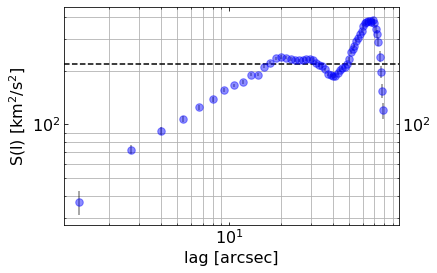

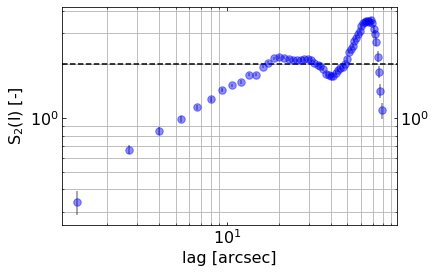

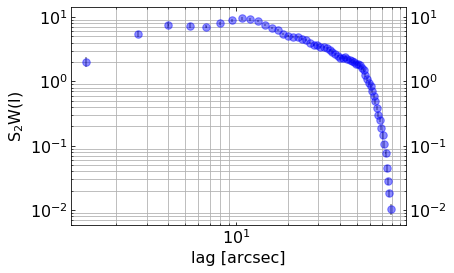

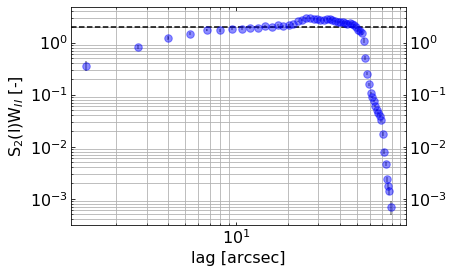

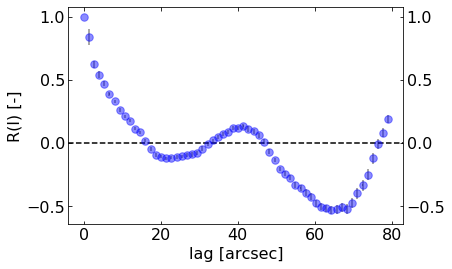

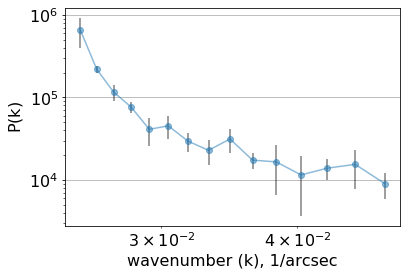

In [10]:
sfH00=sosf(dt)
sfnH00=sosfnorm(dt)
sfwH00=sosfw(dt)
sfw2H00=sosfw2(dt)
afH00=acf(dt)
psH00=ps(dt)

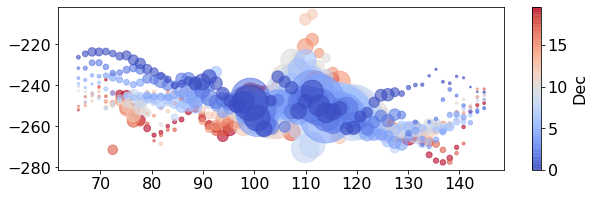

In [11]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt.X, dt.RV, c=dt.Y, s=dt.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

In [12]:
pRA = np.poly1d(np.polyfit(dt.X, dt.RV, 3))
print(pRA)

           3           2
4.633e-05 x - 0.01411 x + 1.199 x - 274.2


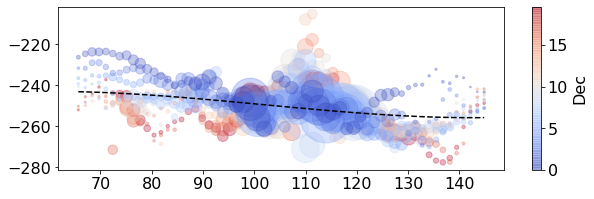

In [13]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt.X, dt.RV, c=dt.Y, s=dt.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")
RAgrid = np.linspace(dt.X.min(), dt.X.max())
ax.plot(RAgrid, pRA(RAgrid), c="k", ls="--")

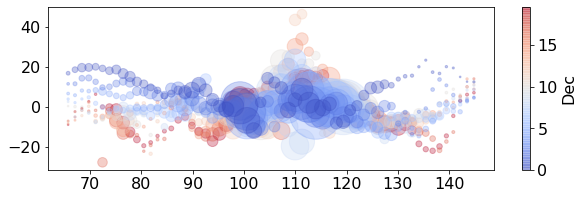

In [14]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt.X, dt.RV - pRA(dt.X), c=dt.Y, s=dt.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

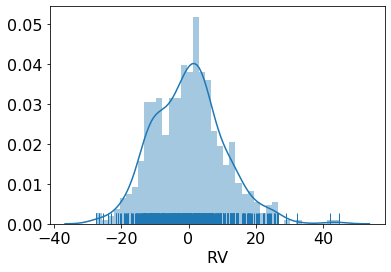

In [15]:
hist=dt.RV-dt.RV.mean()
sns.distplot(hist,bins=40,rug=True)

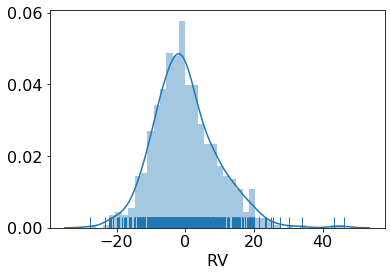

In [16]:
hist2=dt.RV - pRA(dt.X)
sns.distplot(hist2,bins=40,rug=True)

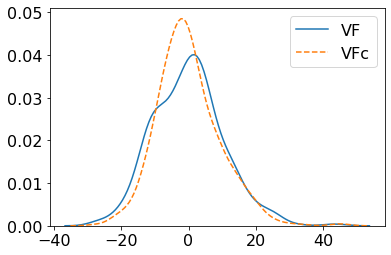

In [17]:
sns.kdeplot(hist, label="VF")
sns.kdeplot(hist2, label="VFc", linestyle='--')


In [18]:
dtc= pd.DataFrame({'X': dt.X, 'Y': dt.Y, 'RV':dt.RV - pRA(dt.X), 'I':dt.I})
dtc.describe()

,X,Y,RV,I
count,600.000000,600.000000,6.000000e+02,600.000000
mean,105.269000,9.390000,-8.104924e-14,2277.239467
std,23.243169,6.256047,9.455325e+00,3750.107456
min,65.710000,0.000000,-2.768895e+01,27.150000
25%,85.485000,4.000000,-6.050071e+00,281.925000
50%,105.270000,9.000000,-9.031610e-01,1017.500000
75%,125.045000,15.000000,5.128628e+00,2403.500000
max,144.830000,19.600000,4.622969e+01,30960.000000


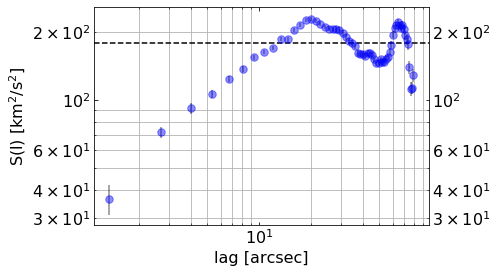

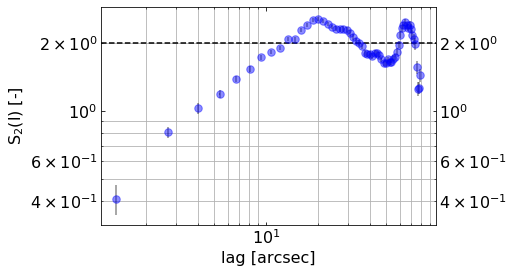

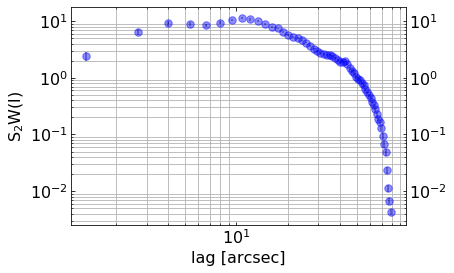

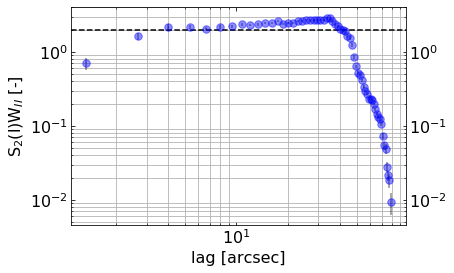

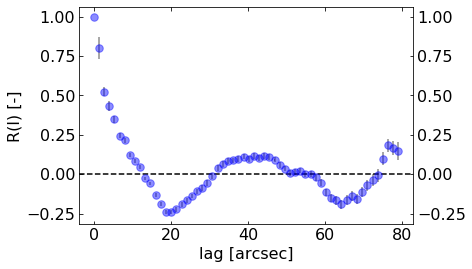

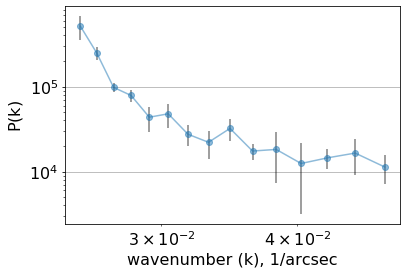

In [19]:
sfH00c=sosf(dtc)
sfnH00c=sosfnorm(dtc)
sfwH00c=sosfw(dtc)
sfw2H00c=sosfw2(dtc)
afH00c=acf(dtc)
psH00c=ps(dtc)

In [20]:
#II

In [21]:
mr=(dt.X<130)&(dt.X>85)
dt1=dt[mr]
dt1.describe()

,X,Y,RV,I
count,330.000000,330.000000,330.000000,330.00000
mean,107.280606,9.390000,-250.078110,3790.96303
std,12.788100,6.260324,9.698000,4506.06462
min,85.820000,0.000000,-270.969636,226.00000
25%,96.550000,4.000000,-256.934280,1275.25000
50%,107.280000,9.000000,-250.390538,2168.50000
75%,118.010000,15.000000,-244.714727,4462.00000
max,128.740000,19.600000,-205.463695,30960.00000


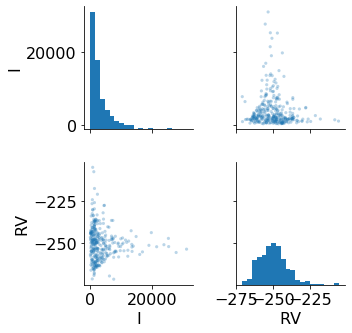

In [22]:
sns.pairplot(dt1, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

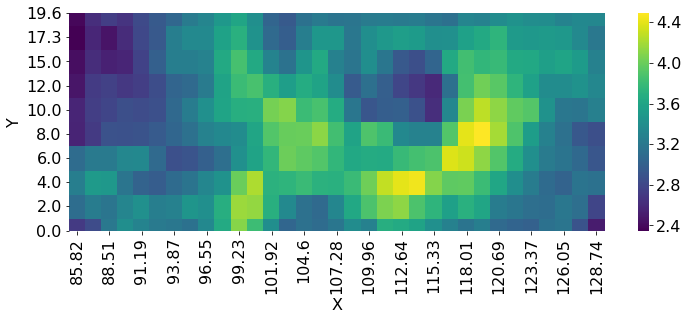

In [23]:
datal=dt1.copy()
datal.I=np.log10(datal.I)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()

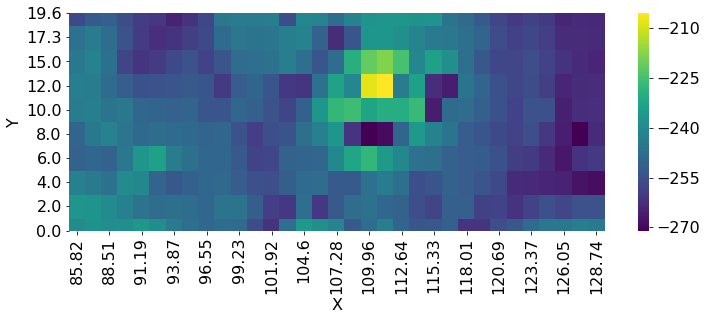

In [24]:
datal=dt1.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:440: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:449: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:884: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:893: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f


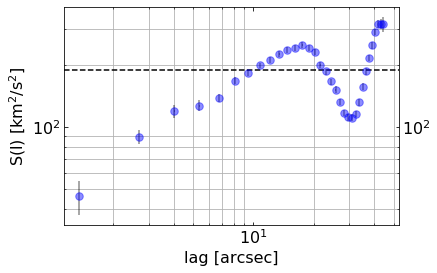

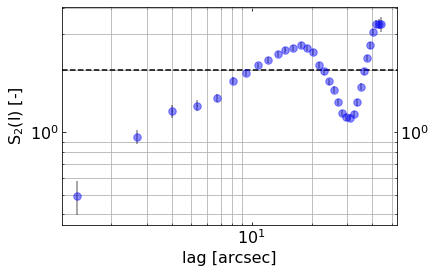

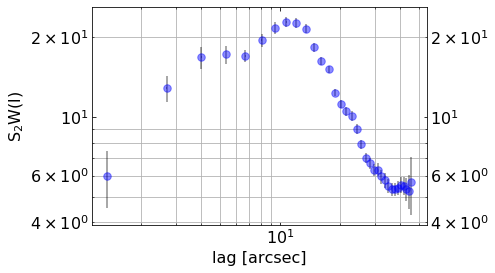

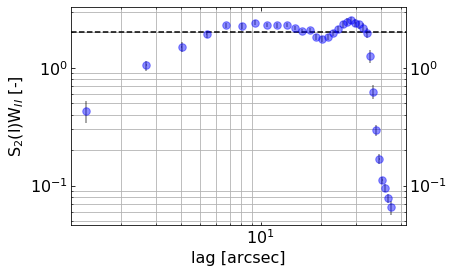

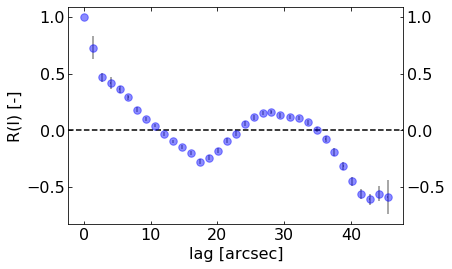

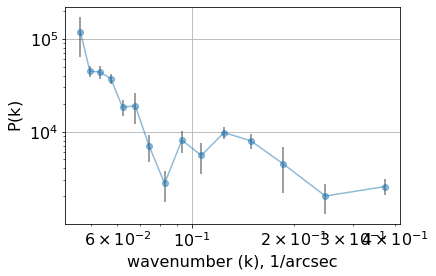

In [25]:
sfH01=sosfs(dt1)
sfnH01=sosfnorms(dt1)
sfwH01=sosfw(dt1)
sfw2H01=sosfw2(dt1)
afH01=acf(dt1)
psH01=ps(dt1)

          3          2
-0.00177 x + 0.5493 x - 56.46 x + 1674


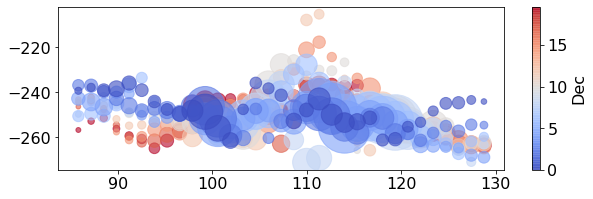

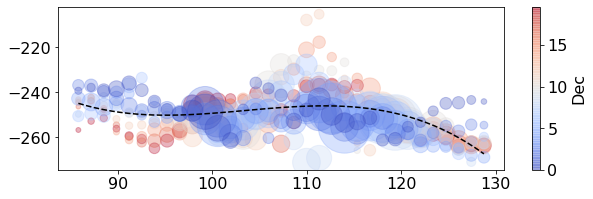

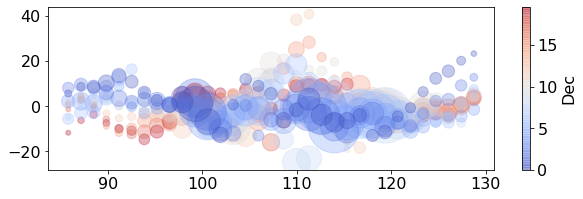

In [26]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt1.X, dt1.RV, c=dt1.Y, s=dt1.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

pRA = np.poly1d(np.polyfit(dt1.X, dt1.RV, 3))
print(pRA)

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt1.X, dt1.RV, c=dt1.Y, s=dt1.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

RAgrid = np.linspace(dt1.X.min(), dt1.X.max())
ax.plot(RAgrid, pRA(RAgrid), c="k", ls="--")

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt1.X, dt1.RV - pRA(dt1.X), c=dt1.Y, s=dt1.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")


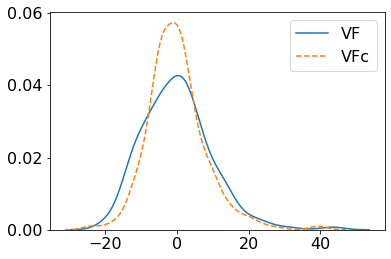

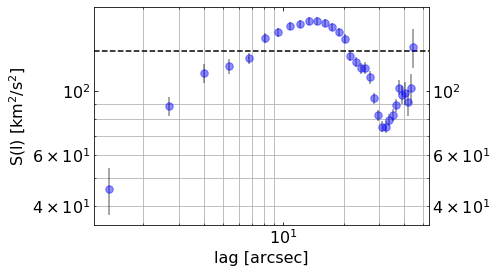

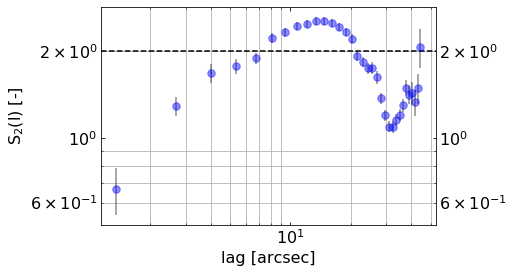

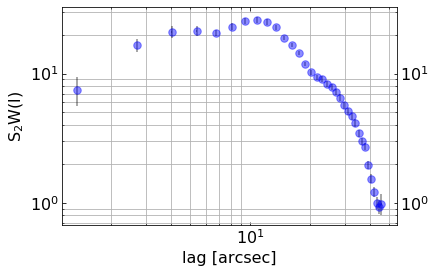

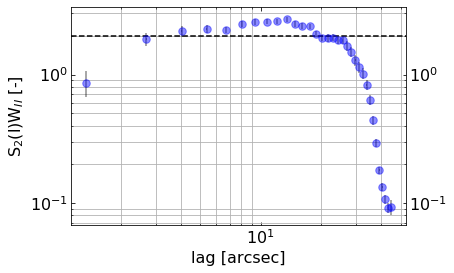

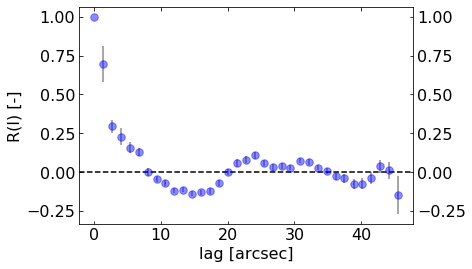

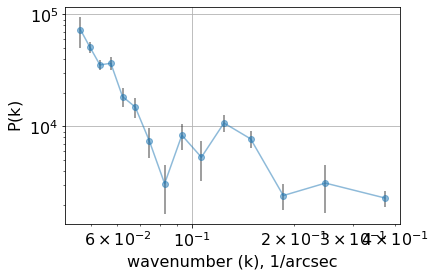

In [27]:
hist=dt1.RV-dt1.RV.mean()
hist2=dt1.RV - pRA(dt1.X)

sns.kdeplot(hist, label="VF")
sns.kdeplot(hist2, label="VFc", linestyle='--')

dtc= pd.DataFrame({'X': dt1.X, 'Y': dt1.Y, 'RV':dt1.RV - pRA(dt1.X), 'I':dt1.I})
dtc.describe()

sfH01c=sosfs(dtc)
sfnH01c=sosfnorms(dtc)
sfwH01c=sosfw(dtc)
sfw2H01c=sosfw2(dtc)
afH01c=acf(dtc)
psH01c=ps(dtc)

In [28]:
#III

In [29]:
mr=(dt.X<120)&(dt.X>95)
dt2=dt[mr]
dt2.describe()

,X,Y,RV,I
count,190.000000,190.000000,190.000000,190.000000
mean,107.280526,9.390000,-247.623016,5054.866316
std,7.365136,6.267347,9.806825,5261.747902
min,95.210000,0.000000,-270.969636,401.400000
25%,100.580000,4.000000,-253.382615,1714.250000
50%,107.280000,9.000000,-249.202843,3193.500000
75%,113.990000,15.000000,-243.252948,6317.500000
max,119.350000,19.600000,-205.463695,30960.000000


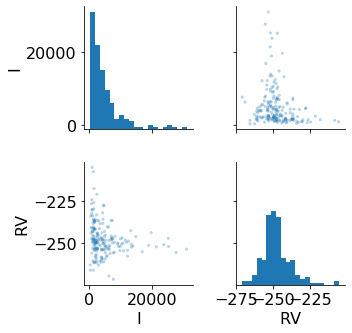

In [30]:
sns.pairplot(dt2, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

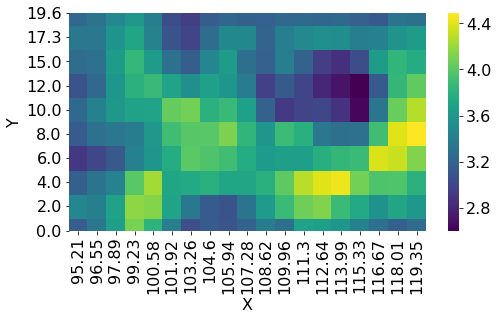

In [31]:
datal=dt2.copy()
datal.I=np.log10(datal.I)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()

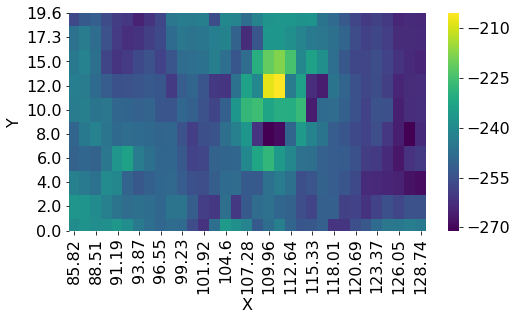

In [32]:
datal=dt1.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

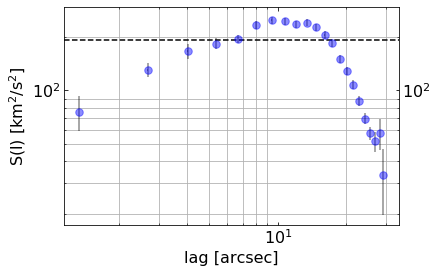

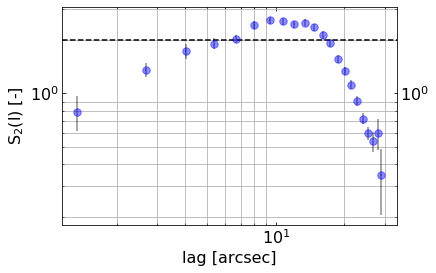

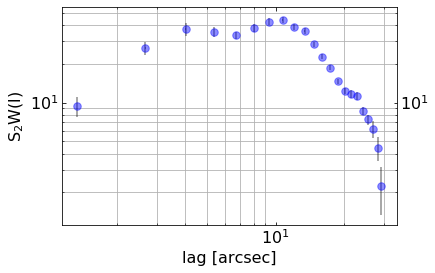

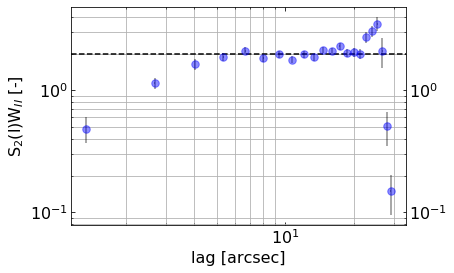

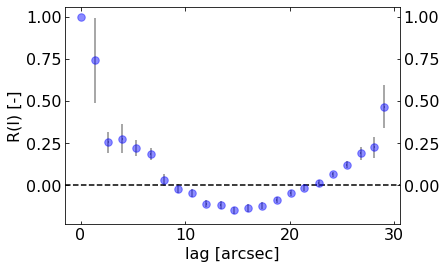

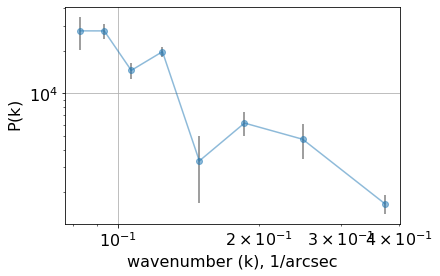

In [33]:
sfH02=sosfs(dt2)
sfnH02=sosfnorms(dt2)
sfwH02=sosfw(dt2)
sfw2H02=sosfw2(dt2)
afH02=acf(dt2)
psH02=ps(dt2)

           3         2
-0.008757 x + 2.755 x - 287.6 x + 9722


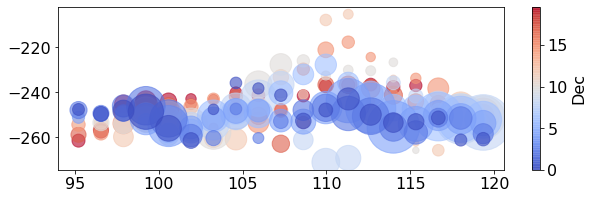

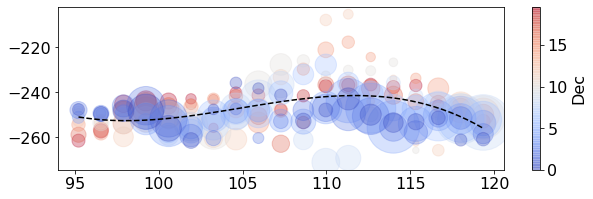

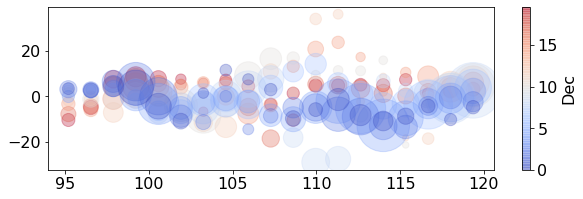

In [34]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt2.X, dt2.RV, c=dt2.Y, s=dt2.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

pRA = np.poly1d(np.polyfit(dt2.X, dt2.RV, 3))
print(pRA)

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt2.X, dt2.RV, c=dt2.Y, s=dt2.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")
RAgrid = np.linspace(dt2.X.min(), dt2.X.max())
ax.plot(RAgrid, pRA(RAgrid), c="k", ls="--")

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt2.X, dt2.RV - pRA(dt2.X), c=dt2.Y, s=dt2.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

hist=dt2.RV-dt2.RV.mean()
hist2=dt2.RV - pRA(dt2.X)



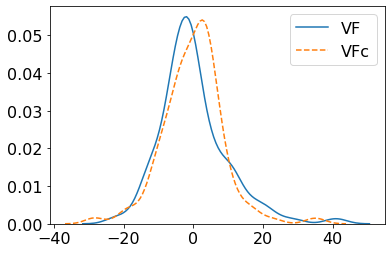

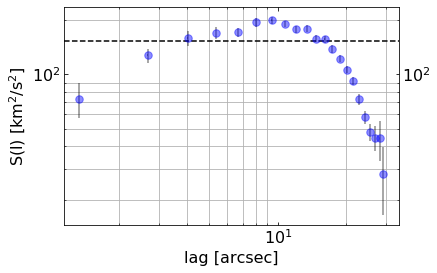

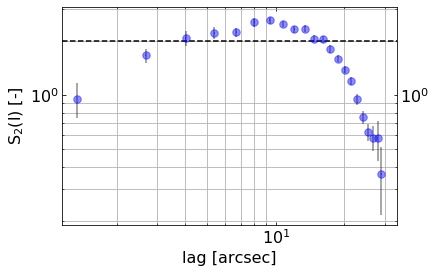

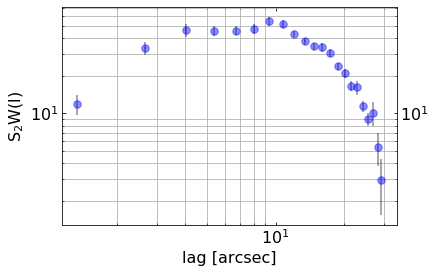

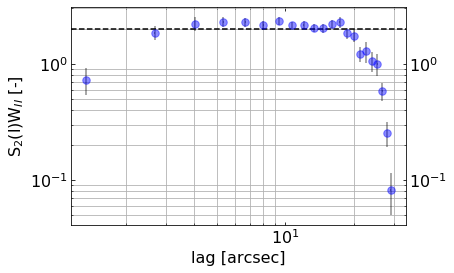

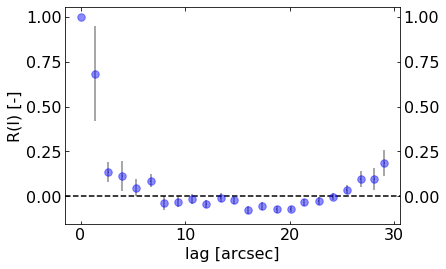

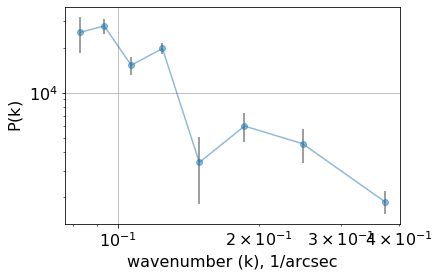

In [35]:
sns.kdeplot(hist, label="VF")
sns.kdeplot(hist2, label="VFc", linestyle='--')

dtc= pd.DataFrame({'X': dt2.X, 'Y': dt2.Y, 'RV':dt2.RV - pRA(dt2.X), 'I':dt2.I})
dtc.describe()

sfH02c=sosfs(dtc)
sfnH02c=sosfnorms(dtc)
sfwH02c=sosfw(dtc)
sfw2H02c=sosfw2(dtc)
afH02c=acf(dtc)
psH02c=ps(dtc)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


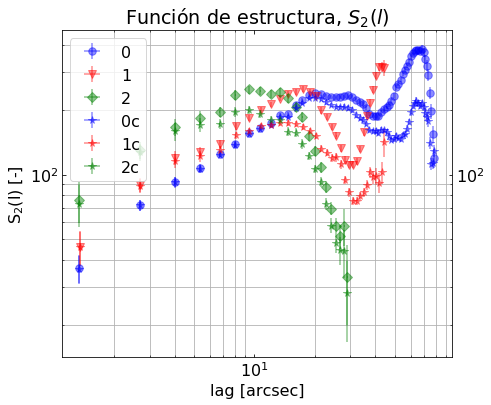

In [36]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfH00['Lag'],sfH00['Nmqvd'],xerr=sfH00.ErrX, yerr=sfH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(sfH01['Lag'],sfH01['Nmqvd'],xerr=sfH01.ErrX, yerr=sfH01.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(sfH02['Lag'],sfH02['Nmqvd'],xerr=sfH02.ErrX, yerr=sfH02.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(sfH00c['Lag'],sfH00c['Nmqvd'],xerr=sfH00c.ErrX, yerr=sfH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


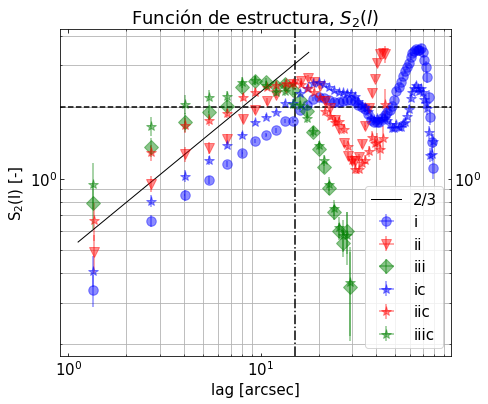

In [37]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfnH00['Lag'],sfnH00['Nmqvd'],xerr=sfnH00.ErrX, yerr=sfnH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='i')
ax.errorbar(sfnH01['Lag'],sfnH01['Nmqvd'],xerr=sfnH01.ErrX, yerr=sfnH01.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='ii')
ax.errorbar(sfnH02['Lag'],sfnH02['Nmqvd'],xerr=sfnH02.ErrX, yerr=sfnH02.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iii')
ax.errorbar(sfnH00c['Lag'],sfnH00c['Nmqvd'],xerr=sfnH00c.ErrX, yerr=sfnH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='ic')
ax.errorbar(sfnH01c['Lag'],sfnH01c['Nmqvd'],xerr=sfnH01c.ErrX, yerr=sfnH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='iic')
ax.errorbar(sfnH02c['Lag'],sfnH02c['Nmqvd'],xerr=sfnH02c.ErrX, yerr=sfnH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iiic')
ax.set(xscale='log',yscale='log')
sgrid = np.logspace(.05, 1.25)
ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=1, label='2/3')
ax.axhline(y=2, color='k', linestyle='--')
ax.axvline(x=15, color='k', linestyle='-.')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower right')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

In [38]:
sfnH00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,0.339167,0.050981,1.169239,1.367121,1.340000,527.0,6.016082e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,0.665344,0.038362,1.687923,2.849084,2.680000,1937.0,6.862265e-03,0.972105,1.287974,0.684402,0.981493,0.142315
2,4.020000,0.850867,0.047591,2.079891,4.325947,4.020000,1911.0,8.921643e-03,0.851731,1.035010,0.657349,0.848030,0.089028
3,5.360000,0.988290,0.040053,2.281282,5.204249,5.360000,3245.0,6.993702e-03,0.778723,0.917626,0.640612,0.778987,0.065293
4,6.700000,1.150800,0.032858,2.203697,4.856279,6.700000,4499.0,6.495173e-03,0.746985,0.877797,0.654090,0.759624,0.052980
5,8.040000,1.275743,0.039023,2.391590,5.719705,8.040000,3757.0,6.395521e-03,0.723127,0.847106,0.643888,0.738040,0.048284
6,9.380000,1.440102,0.033160,2.376902,5.649662,9.380000,5139.0,5.886989e-03,0.713687,0.838492,0.659150,0.737110,0.043339
7,10.720000,1.525673,0.032478,2.431951,5.914386,10.720000,5608.0,5.048444e-03,0.700196,0.811588,0.645436,0.719074,0.039914
8,12.060000,1.598084,0.034141,2.623999,6.885370,12.060000,5908.0,5.215092e-03,0.685189,0.789221,0.631906,0.702105,0.037717
9,13.395895,1.754923,0.035999,2.791042,7.789914,13.395895,6012.0,5.522569e-03,0.678967,0.793510,0.644113,0.705530,0.036845


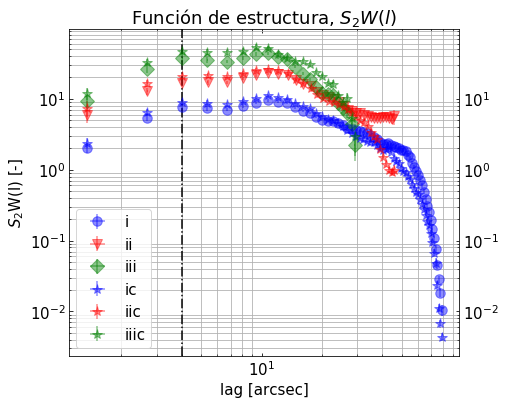

In [39]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfwH00['Lag'],sfwH00['Nmqvd'],xerr=sfwH00.ErrX, yerr=sfwH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='i')
ax.errorbar(sfwH01['Lag'],sfwH01['Nmqvd'],xerr=sfwH01.ErrX, yerr=sfwH01.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='ii')
ax.errorbar(sfwH02['Lag'],sfwH02['Nmqvd'],xerr=sfwH02.ErrX, yerr=sfwH02.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iii')
ax.errorbar(sfwH00c['Lag'],sfwH00c['Nmqvd'],xerr=sfwH00c.ErrX, yerr=sfwH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='ic')
ax.errorbar(sfwH01c['Lag'],sfwH01c['Nmqvd'],xerr=sfwH01c.ErrX, yerr=sfwH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='iic')
ax.errorbar(sfwH02c['Lag'],sfwH02c['Nmqvd'],xerr=sfwH02c.ErrX, yerr=sfwH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iiic')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.axvline(x=4, color='k', linestyle='-.')

ax.set(xlabel='lag [arcsec]', ylabel='$S_{2}$W(l) [-]')
plt.title('Función de estructura, $S_{2}W(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

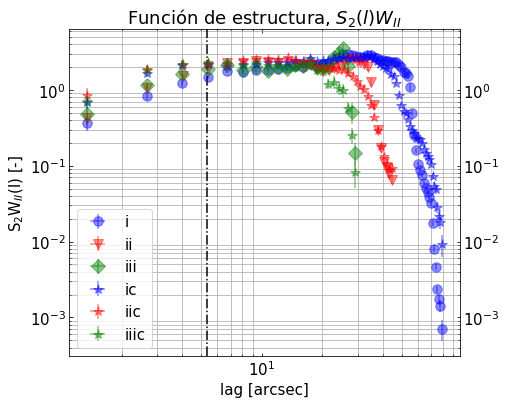

In [40]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfw2H00['Lag'],sfw2H00['Nmqvd'],xerr=sfw2H00.ErrX, yerr=sfw2H00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='i')
ax.errorbar(sfw2H01['Lag'],sfw2H01['Nmqvd'],xerr=sfw2H01.ErrX, yerr=sfw2H01.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='ii')
ax.errorbar(sfw2H02['Lag'],sfw2H02['Nmqvd'],xerr=sfw2H02.ErrX, yerr=sfw2H02.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iii')
ax.errorbar(sfw2H00c['Lag'],sfw2H00c['Nmqvd'],xerr=sfw2H00c.ErrX, yerr=sfw2H00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='ic')
ax.errorbar(sfw2H01c['Lag'],sfw2H01c['Nmqvd'],xerr=sfw2H01c.ErrX, yerr=sfw2H01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='iic')
ax.errorbar(sfw2H02c['Lag'],sfw2H02c['Nmqvd'],xerr=sfw2H02c.ErrX, yerr=sfw2H02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iiic')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.axvline(x=5.35, color='k', linestyle='-.')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$W$_{II}$(l) [-]')
plt.title('Función de estructura, $S_{2}(l)W_{II}$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


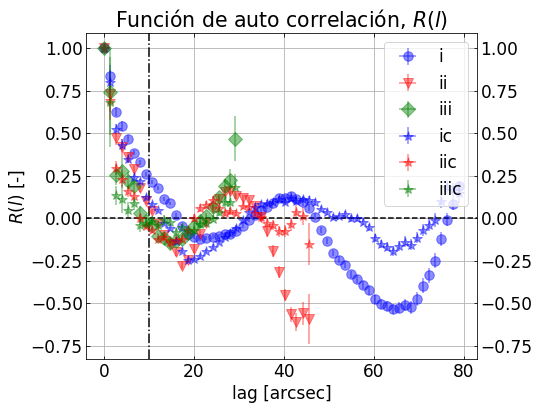

In [41]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(afH00['Lag'],afH00['Nmqvd'],xerr=afH00.ErrX, yerr=afH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='i')
ax.errorbar(afH01['Lag'],afH01['Nmqvd'],xerr=afH01.ErrX, yerr=afH01.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='ii')
ax.errorbar(afH02['Lag'],afH02['Nmqvd'],xerr=afH02.ErrX, yerr=afH02.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iii')
ax.errorbar(afH00c['Lag'],afH00c['Nmqvd'],xerr=afH00c.ErrX, yerr=afH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='ic')
ax.errorbar(afH01c['Lag'],afH01c['Nmqvd'],xerr=afH01c.ErrX, yerr=afH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='iic')
ax.errorbar(afH02c['Lag'],afH02c['Nmqvd'],xerr=afH02c.ErrX, yerr=afH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iiic')

ax.axhline(y=0, color='k', linestyle='--')
ax.axvline(x=10, color='k', linestyle='-.')

ax.set(xlabel='lag [arcsec]', ylabel='$R(l)$ [-]')
plt.title('Función de auto correlación, $R(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper right')
plt.grid(which='major')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

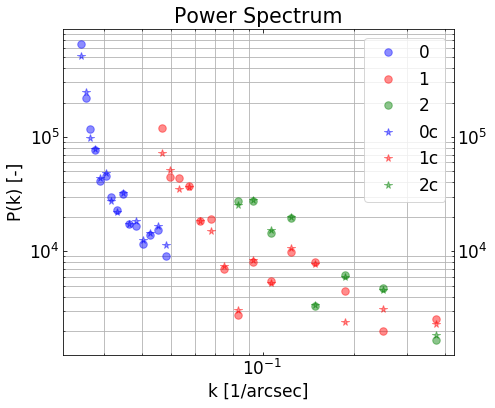

In [42]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(psH00['k'],psH00['Pk'], fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(psH01['k'],psH01['Pk'], fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(psH02['k'],psH02['Pk'], fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(psH00c['k'],psH00c['Pk'], fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(psH01c['k'],psH01c['Pk'], fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(psH02c['k'],psH02c['Pk'], fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='k [1/arcsec]', ylabel='P(k) [-]')
plt.title('Power Spectrum')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper right')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

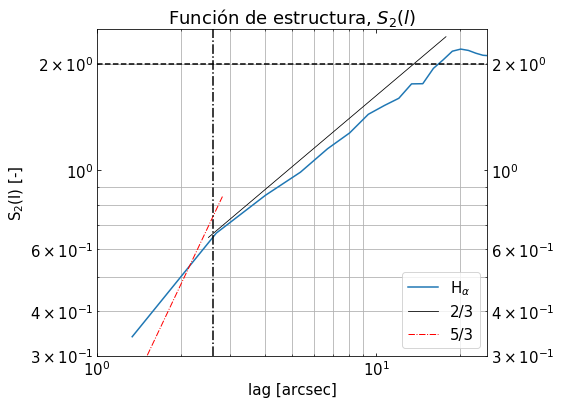

In [96]:
fig, ax=plt.subplots(figsize=(7,6))

plt.loglog(sfnH00.Lag, sfnH00.Nmqvd, label=r'H$_{\alpha}$')
plt.xlim(1,25)
plt.ylim(0.3,2.5)
sgrid = np.logspace(0.4, 1.25)
sgrid2 = np.logspace(0.1, 0.45)
ax.plot(sgrid, 0.35*sgrid**(2/3), color="k", lw=0.8, label='2/3')
ax.plot(sgrid2, 0.15*sgrid2**(5/3), color="r", lw=1.0, label='5/3',linestyle='-.')
plt.grid(which='minor')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower right')
ax.axhline(y=2, color='k', linestyle='--')

ax.axvline(x=2.6, color='k', linestyle='-.')

#ax.axhline(y=2, color='k', linestyle='--')

In [44]:
#sfnH00.to_csv('datasfnH00.csv')

In [45]:
sfnH00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,0.339167,0.050981,1.169239,1.367121,1.340000,527.0,6.016082e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,0.665344,0.038362,1.687923,2.849084,2.680000,1937.0,6.862265e-03,0.972105,1.287974,0.684402,0.981493,0.142315
2,4.020000,0.850867,0.047591,2.079891,4.325947,4.020000,1911.0,8.921643e-03,0.851731,1.035010,0.657349,0.848030,0.089028
3,5.360000,0.988290,0.040053,2.281282,5.204249,5.360000,3245.0,6.993702e-03,0.778723,0.917626,0.640612,0.778987,0.065293
4,6.700000,1.150800,0.032858,2.203697,4.856279,6.700000,4499.0,6.495173e-03,0.746985,0.877797,0.654090,0.759624,0.052980
5,8.040000,1.275743,0.039023,2.391590,5.719705,8.040000,3757.0,6.395521e-03,0.723127,0.847106,0.643888,0.738040,0.048284
6,9.380000,1.440102,0.033160,2.376902,5.649662,9.380000,5139.0,5.886989e-03,0.713687,0.838492,0.659150,0.737110,0.043339
7,10.720000,1.525673,0.032478,2.431951,5.914386,10.720000,5608.0,5.048444e-03,0.700196,0.811588,0.645436,0.719074,0.039914
8,12.060000,1.598084,0.034141,2.623999,6.885370,12.060000,5908.0,5.215092e-03,0.685189,0.789221,0.631906,0.702105,0.037717
9,13.395895,1.754923,0.035999,2.791042,7.789914,13.395895,6012.0,5.522569e-03,0.678967,0.793510,0.644113,0.705530,0.036845


In [46]:
sfnH01.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,32.000000,32.000000
mean,22.924846,1.989521,0.082584,2.806751,8.800844,22.924846,1625.939394,0.012346,0.467705,inf,-inf,0.534295,0.060016
std,13.053756,0.732408,0.045504,0.975621,5.845563,13.053756,969.782319,0.007249,0.233102,NaN,NaN,0.185264,0.030589
min,1.350000,0.489582,0.041590,1.487375,2.212284,1.350000,86.000000,0.000186,0.000000,0.357392,-inf,0.275103,0.033940
25%,12.080236,1.399097,0.061360,2.096443,4.395072,12.080236,805.000000,0.008349,0.257230,0.497747,0.334511,0.380307,0.038216
50%,22.930643,1.975269,0.072917,2.560774,6.557561,22.930643,1515.000000,0.010158,0.485047,0.631810,0.478885,0.486276,0.047434
75%,33.714722,2.517621,0.085061,3.481177,12.118592,33.714722,2533.000000,0.013576,0.652290,0.804085,0.587385,0.684407,0.078135
max,44.459942,3.369533,0.284281,4.574340,20.924587,44.459942,3100.000000,0.038015,0.964577,inf,0.645834,0.978593,0.180623


In [47]:
sfnH01

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.350000,0.489582,0.090635,1.616258,2.612289,1.350000,319.0,0.000186,0.000000,inf,-inf,NaN,NaN
1,2.690000,0.952001,0.072917,2.397401,5.747530,2.690000,1082.0,0.007414,0.964577,1.368567,0.602635,0.978593,0.180623
2,4.030000,1.269474,0.093648,3.127050,9.778441,4.030000,1116.0,0.010158,0.881214,1.123478,0.645834,0.883508,0.112586
3,5.370000,1.351059,0.079422,3.316773,11.000983,5.370000,1745.0,0.009498,0.762133,0.924833,0.568295,0.751754,0.084144
4,6.710000,1.473270,0.061360,3.002239,9.013437,6.710000,2395.0,0.008627,0.690868,0.840176,0.554599,0.695214,0.067334
5,8.077184,1.780999,0.068527,3.307091,10.936850,8.077184,2330.0,0.008525,0.680435,0.857412,0.604991,0.714279,0.061080
6,9.397473,1.944477,0.065162,3.301457,10.899621,9.397473,2568.0,0.008499,0.671299,0.833300,0.605699,0.703433,0.055227
7,10.782490,2.118140,0.065448,3.568566,12.734662,10.782490,2974.0,0.007542,0.664668,0.818116,0.608092,0.696959,0.051228
8,12.080236,2.253773,0.070013,3.783921,14.318057,12.080236,2922.0,0.007512,0.658117,0.804085,0.604801,0.689001,0.048634
9,13.479054,2.399634,0.071978,4.006908,16.055308,13.479054,3100.0,0.008161,0.652290,0.792600,0.603735,0.682875,0.046234


In [48]:
sfnH02.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000,21.000000,21.000000
mean,15.377228,1.570279,0.104874,2.750610,9.429398,15.377228,796.590909,1.755245e-02,0.321055,inf,-inf,0.333849,0.072541
std,8.662060,0.768128,0.034023,1.397242,7.053498,8.662060,489.660977,1.258650e-02,0.312654,NaN,NaN,0.319967,0.039311
min,1.340000,0.347406,0.049878,0.612491,0.375145,1.340000,20.000000,4.495700e-16,-0.255016,-0.075485,-inf,-0.276590,0.049223
25%,8.375000,0.818701,0.073673,1.346992,1.849277,8.375000,401.500000,1.148335e-02,0.046790,0.178611,-0.103663,0.074266,0.050548
50%,15.364416,1.651946,0.109074,3.216267,10.399047,15.364416,915.000000,1.248839e-02,0.399199,0.551703,0.276243,0.415776,0.055905
75%,22.425357,2.304659,0.122138,4.060753,16.490527,22.425357,1245.500000,1.664927e-02,0.582257,0.770493,0.424347,0.600294,0.074244
max,29.063579,2.586200,0.172940,4.308090,18.559635,29.063579,1444.000000,5.067805e-02,0.779990,inf,0.489139,0.799703,0.213857


In [49]:
sfnH02

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,0.788421,0.172940,2.173818,4.725483,1.340000,159.0,4.495700e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,1.353813,0.123204,2.982446,8.894983,2.680000,587.0,1.269107e-02,0.779990,1.262898,0.356222,0.799703,0.213857
2,4.020000,1.730981,0.159086,3.761307,14.147431,4.020000,560.0,1.669742e-02,0.722732,1.021254,0.447553,0.730513,0.135260
3,5.360000,1.909882,0.136191,4.168864,17.379431,5.360000,938.0,1.285420e-02,0.652947,0.866535,0.441802,0.653761,0.100111
4,6.700000,2.030070,0.109524,3.895428,15.174360,6.700000,1266.0,1.215458e-02,0.596746,0.774162,0.429973,0.600294,0.081139
5,8.040000,2.443760,0.134300,4.308090,18.559635,8.040000,1030.0,1.217226e-02,0.597346,0.799431,0.489139,0.628638,0.074244
6,9.380000,2.586200,0.111868,4.136096,17.107291,9.380000,1368.0,1.141815e-02,0.588480,0.759483,0.485827,0.611263,0.065169
7,10.720000,2.553148,0.106116,4.011411,16.091421,10.720000,1430.0,9.879931e-03,0.563587,0.703746,0.449294,0.572209,0.060078
8,12.060000,2.460816,0.107332,4.077200,16.623563,12.060000,1444.0,1.055246e-02,0.529045,0.650154,0.407469,0.528889,0.057201
9,13.395895,2.509618,0.111309,4.131963,17.073115,13.395895,1379.0,1.162035e-02,0.500682,0.629324,0.397071,0.509026,0.054848


In [50]:
sfnH00c.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01,59.000000,59.000000,59.000000,58.000000,58.000000
mean,40.171366,1.914061,0.064149,2.995931,9.465443,40.171366,2903.559322,8.266118e-03,0.426242,inf,-inf,0.492367,0.043772
std,23.003117,0.447244,0.021225,0.705893,4.146605,23.003117,1748.174568,3.971593e-03,0.213258,NaN,NaN,0.170156,0.019589
min,1.340000,0.408751,0.039524,1.386737,1.923040,1.340000,212.000000,5.819839e-16,0.000000,0.333112,-inf,0.250973,0.026384
25%,20.749135,1.694659,0.050305,2.591091,6.713764,20.749135,1518.000000,5.936440e-03,0.232699,0.464913,0.355315,0.359289,0.029628
50%,40.155101,1.935235,0.055997,3.007982,9.047956,40.155101,2678.000000,7.042842e-03,0.370359,0.505855,0.409030,0.414768,0.036206
75%,59.611285,2.306418,0.071091,3.476838,12.089990,59.611285,4091.000000,9.313150e-03,0.623080,0.732804,0.583829,0.643723,0.053092
max,78.960043,2.556632,0.127284,4.217044,17.783463,78.960043,6024.000000,2.401320e-02,0.977928,inf,0.690702,0.987232,0.142029


In [51]:
sfnH00c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,0.408751,0.061224,1.408148,1.982881,1.340000,530.0,5.819839e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,0.805091,0.046519,2.050000,4.202500,2.680000,1943.0,6.848721e-03,0.977928,1.293065,0.690702,0.987232,0.142029
2,4.020000,1.028528,0.057971,2.536865,6.435684,4.020000,1916.0,8.910150e-03,0.854805,1.037556,0.660096,0.850819,0.088983
3,5.360000,1.192364,0.048806,2.782357,7.741512,5.360000,3251.0,6.988699e-03,0.779792,0.918251,0.641437,0.779827,0.065246
4,6.700000,1.386311,0.040141,2.694237,7.258913,6.700000,4506.0,6.492316e-03,0.746709,0.877388,0.653855,0.759317,0.052938
5,8.040000,1.531543,0.047746,2.929645,8.582822,8.040000,3766.0,6.391613e-03,0.721209,0.844916,0.641649,0.735924,0.048286
6,9.380000,1.727562,0.040462,2.902853,8.426554,9.380000,5148.0,5.881767e-03,0.710829,0.835996,0.656806,0.734544,0.043331
7,10.720000,1.826780,0.039524,2.961172,8.768541,10.720000,5614.0,5.046179e-03,0.696484,0.808328,0.642363,0.715725,0.039899
8,12.060000,1.907083,0.041264,3.173589,10.071665,12.060000,5916.0,5.210350e-03,0.680409,0.784577,0.627508,0.697498,0.037673
9,13.395895,2.083608,0.043261,3.357365,11.271903,13.395895,6024.0,5.515276e-03,0.672741,0.786856,0.637714,0.699104,0.036764


In [52]:
sfnH01c.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,32.000000,32.000000
mean,22.924846,1.750294,0.092507,3.163535,11.027392,22.924846,1628.212121,0.012340,0.327612,inf,-inf,0.392285,0.058469
std,13.053756,0.516743,0.048350,1.025328,6.403385,13.053756,971.181006,0.007251,0.281363,NaN,NaN,0.238838,0.029502
min,1.350000,0.667097,0.048883,1.579759,2.495640,1.350000,86.000000,0.000185,-0.011291,0.234350,-inf,0.134411,0.035699
25%,12.080236,1.333439,0.070905,2.322047,5.391902,12.080236,808.000000,0.008341,0.042779,0.308887,0.145987,0.154266,0.039610
50%,22.930643,1.740436,0.080301,3.217402,10.351678,22.930643,1518.000000,0.010142,0.308486,0.442707,0.259313,0.342360,0.047095
75%,33.714722,2.213069,0.099200,4.202219,17.658646,33.714722,2539.000000,0.013567,0.545519,0.707213,0.491855,0.577985,0.069361
max,44.459942,2.532570,0.314336,4.503018,20.277172,44.459942,3104.000000,0.038015,0.956965,inf,0.618733,0.970680,0.179740


In [53]:
sfnH01c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.350000,0.667097,0.122487,2.187680,4.785942,1.350000,320.0,0.000185,0.000000,inf,-inf,NaN,NaN
1,2.690000,1.290392,0.099200,3.266078,10.667264,2.690000,1085.0,0.007400,0.956965,1.358639,0.596436,0.970680,0.179740
2,4.030000,1.680121,0.126740,4.239626,17.974430,4.030000,1120.0,0.010142,0.856625,1.096569,0.618733,0.857309,0.112628
3,5.370000,1.768278,0.106985,4.471683,19.995950,5.370000,1748.0,0.009493,0.732348,0.895497,0.538737,0.722194,0.084191
4,6.710000,1.884032,0.081920,4.009053,16.072508,6.710000,2396.0,0.008626,0.652735,0.800540,0.514632,0.655969,0.067402
5,8.077184,2.213069,0.090006,4.347381,18.899720,8.077184,2334.0,0.008519,0.631883,0.806025,0.552903,0.663604,0.061051
6,9.397473,2.317909,0.082908,4.202219,17.658646,9.397473,2570.0,0.008496,0.608694,0.764555,0.536243,0.636497,0.054998
7,10.782490,2.434853,0.080437,4.388067,19.255131,10.782490,2977.0,0.007539,0.588067,0.736384,0.525812,0.616755,0.050995
8,12.080236,2.483725,0.081762,4.421949,19.553637,12.080236,2926.0,0.007504,0.566743,0.707213,0.507667,0.593875,0.048320
9,13.479054,2.528341,0.079722,4.440903,19.721618,13.479054,3104.0,0.008159,0.545519,0.680691,0.491855,0.572689,0.045870


In [54]:
sfnH02c.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000,21.000000,21.000000
mean,15.377228,1.605277,0.112066,2.845616,10.051210,15.377228,797.909091,1.754036e-02,0.237309,inf,-inf,0.260233,0.072913
std,8.662060,0.740161,0.043177,1.430633,7.934276,8.662060,490.165172,1.258385e-02,0.320118,NaN,NaN,0.323925,0.039626
min,1.340000,0.364729,0.060290,0.645758,0.417003,1.340000,20.000000,4.500134e-16,-0.323043,-0.120469,-inf,-0.329632,0.046663
25%,8.375000,0.949545,0.075231,1.454034,2.123060,8.375000,401.500000,1.147323e-02,0.002898,0.129749,-0.157703,0.008498,0.050648
50%,15.364416,1.734172,0.104349,3.128192,9.827690,15.364416,917.000000,1.247147e-02,0.259979,0.434941,0.180095,0.304705,0.057406
75%,22.425357,2.224446,0.144474,4.005335,16.043050,22.425357,1246.250000,1.663812e-02,0.482935,0.702533,0.364618,0.516401,0.077571
max,29.063579,2.596885,0.208409,4.906634,24.075060,29.063579,1446.000000,5.067805e-02,0.802509,inf,0.434029,0.822066,0.214351


In [55]:
sfnH02c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,0.951409,0.208409,2.627942,6.906079,1.340000,160.0,4.500134e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,1.659383,0.152725,3.703395,13.715134,2.680000,589.0,1.265723e-02,0.802509,1.286236,0.377452,0.822066,0.214351
2,4.020000,2.064303,0.195883,4.639570,21.525614,4.020000,562.0,1.668257e-02,0.715567,1.012647,0.434029,0.720748,0.136398
3,5.360000,2.213179,0.160207,4.906634,24.075060,5.360000,939.0,1.284891e-02,0.626058,0.837757,0.411907,0.625241,0.100374
4,6.700000,2.228202,0.120094,4.271374,18.244632,6.700000,1266.0,1.215458e-02,0.544152,0.715001,0.371265,0.543473,0.081020
5,8.040000,2.545378,0.144364,4.630921,21.445426,8.040000,1030.0,1.217226e-02,0.520372,0.718012,0.406097,0.548160,0.074389
6,9.380000,2.596885,0.113847,4.212344,17.743840,9.380000,1370.0,1.140453e-02,0.492887,0.665128,0.391189,0.516401,0.065278
7,10.720000,2.480076,0.105071,3.973286,15.787001,10.720000,1431.0,9.875851e-03,0.453079,0.599604,0.344677,0.465787,0.060310
8,12.060000,2.328185,0.103627,3.939182,15.517152,12.060000,1446.0,1.054475e-02,0.406917,0.539634,0.296417,0.414323,0.057406
9,13.395895,2.333446,0.108147,4.016018,16.128400,13.395895,1380.0,1.161566e-02,0.370250,0.516753,0.283036,0.390013,0.055675


In [56]:
sfwH00.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01,59.000000,59.000000,59.000000,58.000000,58.000000
mean,40.171366,3.178154,0.163759,9.604359,191.816942,40.171366,2899.610169,8.270778e-03,-0.128113,inf,-inf,-0.014448,0.068679
std,23.003117,2.747142,0.167969,10.064294,342.930730,23.003117,1745.425697,3.972284e-03,0.574074,NaN,NaN,0.557456,0.025359
min,1.340000,0.010408,0.001883,0.027354,0.000748,1.340000,212.000000,6.016082e-16,-1.201897,-1.208278,-inf,-1.263278,0.033862
25%,20.749135,0.896723,0.055427,2.212237,4.900813,20.749135,1516.500000,5.939199e-03,-0.488452,-0.151991,-0.308243,-0.311235,0.051140
50%,40.155101,2.322627,0.121087,6.605383,43.631090,40.155101,2673.000000,7.053104e-03,-0.212730,0.110927,-0.020547,-0.046163,0.064907
75%,59.611285,4.872256,0.162932,11.687014,136.587182,59.611285,4086.000000,9.315228e-03,0.193950,0.404455,0.246173,0.280677,0.082718
max,78.960043,9.496729,0.812034,35.488775,1259.453173,78.960043,6012.000000,2.401320e-02,1.416233,inf,1.023969,1.423359,0.189976


In [57]:
sfwH00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,2.026972,0.334123,7.663014,58.721780,1.340000,527.0,6.016082e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,5.409740,0.608439,26.771294,716.702187,2.680000,1937.0,6.862265e-03,1.416233,1.829874,1.023969,1.423359,0.189976
2,4.020000,7.606401,0.812034,35.488775,1259.453173,4.020000,1911.0,8.921643e-03,1.226625,1.460034,0.962094,1.216251,0.117442
3,5.360000,7.338476,0.601251,34.244927,1172.715004,5.360000,3245.0,6.993702e-03,0.981386,1.114818,0.756349,0.950851,0.085407
4,6.700000,7.038579,0.360140,24.153543,583.393620,6.700000,4499.0,6.495173e-03,0.798751,0.916403,0.646038,0.787064,0.063904
5,8.040000,7.966263,0.470754,28.850700,832.362873,8.040000,3757.0,6.395521e-03,0.714898,0.896446,0.644717,0.752020,0.061238
6,9.380000,8.841167,0.472760,33.887395,1148.355525,9.380000,5139.0,5.886989e-03,0.671334,0.876247,0.650255,0.732612,0.058849
7,10.720000,9.496729,0.449088,33.627675,1130.820559,10.720000,5608.0,5.048444e-03,0.642880,0.851546,0.646029,0.713485,0.056368
8,12.060000,9.118576,0.391062,30.055833,903.353082,12.060000,5908.0,5.215092e-03,0.603701,0.785488,0.595003,0.661397,0.050701
9,13.395895,8.699656,0.352712,27.346009,747.804225,13.395895,6012.0,5.522569e-03,0.560119,0.728241,0.548487,0.612282,0.047419


In [58]:
sfwH01.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,33.000000,33.000000
mean,23.593736,11.039852,0.664346,24.445742,913.930210,23.593736,1578.882353,0.013765,0.138996,inf,-inf,0.233831,0.080584
std,13.433130,6.112237,0.413532,18.053305,1142.313256,13.433130,993.613020,0.010930,0.427114,NaN,NaN,0.366906,0.037969
min,1.350000,5.238739,0.296630,6.913794,47.800544,1.350000,26.000000,0.000186,-0.377113,0.064678,-inf,-0.144649,0.049451
25%,12.429940,5.679991,0.354530,9.942568,99.121285,12.429940,732.250000,0.008369,-0.244517,0.096027,-0.109549,-0.094745,0.053242
50%,23.607957,8.444910,0.423698,17.817316,319.053665,23.607957,1460.000000,0.010180,0.037512,0.274252,0.029409,0.122823,0.071351
75%,34.752686,16.647015,0.946654,40.961071,1683.332669,34.752686,2498.500000,0.013738,0.505154,0.737572,0.424571,0.552469,0.091186
max,45.667126,22.801277,1.654541,57.796067,3340.385413,45.667126,3100.000000,0.060609,1.108543,inf,0.651594,1.131468,0.245052


In [59]:
sfwH01

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.350000,5.971098,1.440346,25.685043,659.721443,1.350000,319.0,0.000186,0.000000,inf,-inf,NaN,NaN
1,2.690000,12.822492,1.430927,47.046841,2213.405202,2.690000,1082.0,0.007414,1.108543,1.662385,0.623477,1.131468,0.245052
2,4.030000,16.768955,1.654541,55.247787,3052.317972,4.030000,1116.0,0.010158,0.961782,1.282607,0.651594,0.965328,0.148738
3,5.370000,17.208280,1.383965,57.796067,3340.385413,5.370000,1745.0,0.009498,0.799008,1.022548,0.549366,0.790307,0.111587
4,6.710000,17.043385,0.864893,42.317946,1790.808577,6.710000,2395.0,0.008627,0.671630,0.857112,0.486848,0.671863,0.087272
5,8.077184,19.457034,1.033338,49.868620,2486.879270,8.077184,2330.0,0.008525,0.620435,0.843554,0.509024,0.657671,0.080302
6,9.397473,21.704447,1.129574,57.230533,3275.333867,9.397473,2568.0,0.008499,0.598936,0.833548,0.526221,0.652902,0.075714
7,10.782490,22.801277,1.016077,55.401809,3069.360482,10.782490,2974.0,0.007542,0.579574,0.798687,0.518912,0.632391,0.069379
8,12.080236,22.590975,0.973907,52.636063,2770.555172,12.080236,2922.0,0.007512,0.553740,0.752405,0.488467,0.598204,0.064805
9,13.479054,21.494834,0.829378,46.170373,2131.703338,13.479054,3100.0,0.008161,0.518690,0.693073,0.445643,0.552469,0.059928


In [60]:
sfwH02.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000,21.000000,21.000000
mean,15.377228,22.299928,1.647686,46.674798,3333.383692,15.377228,796.590909,1.755245e-02,0.333229,inf,-inf,0.393972,0.069548
std,8.662060,14.058137,1.010139,34.782750,3677.529346,8.662060,489.660977,1.258650e-02,0.544967,NaN,NaN,0.526218,0.036077
min,1.340000,2.236226,0.664686,3.926980,15.421172,1.340000,20.000000,4.495700e-16,-0.500960,-0.291296,-inf,-0.491995,0.040789
25%,8.375000,9.805384,0.869731,19.086791,364.610036,8.375000,401.500000,1.148335e-02,-0.075294,0.164128,-0.087582,0.017169,0.051113
50%,15.364416,20.734539,1.264584,33.193585,1115.002819,15.364416,915.000000,1.248839e-02,0.299397,0.510702,0.232617,0.359083,0.061321
75%,22.425357,36.106443,2.385238,77.530231,6013.641792,22.425357,1245.500000,1.664927e-02,0.676879,0.925866,0.653061,0.755378,0.070725
max,29.063579,43.866662,4.225461,99.903334,9980.676184,29.063579,1444.000000,5.067805e-02,1.502006,inf,1.090164,1.510316,0.200049


In [61]:
sfwH02

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,9.316156,1.628823,20.473987,419.184151,1.340000,159.0,4.495700e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,26.386729,3.085064,74.681497,5577.325952,2.680000,587.0,1.269107e-02,1.502006,1.938780,1.090164,1.510316,0.200049
2,4.020000,37.233383,4.225461,99.903334,9980.676184,4.020000,560.0,1.669742e-02,1.287038,1.533869,1.004783,1.275230,0.124800
3,5.360000,35.584697,3.176413,97.231458,9453.956468,5.360000,938.0,1.285420e-02,1.022744,1.167027,0.783047,0.990939,0.091432
4,6.700000,33.404993,1.866173,66.373877,4405.491537,6.700000,1266.0,1.215458e-02,0.821698,0.946599,0.657583,0.808626,0.068330
5,8.040000,38.182698,2.537885,81.410341,6627.643692,8.040000,1030.0,1.217226e-02,0.731888,0.930460,0.658974,0.773774,0.066235
6,9.380000,42.724063,2.625929,97.088360,9426.149653,9.380000,1368.0,1.141815e-02,0.686778,0.912085,0.667271,0.755378,0.064140
7,10.720000,43.866662,2.491660,94.190008,8871.757566,10.720000,1430.0,9.879931e-03,0.647181,0.864091,0.639497,0.716923,0.060108
8,12.060000,39.020126,2.065974,78.479809,6159.080405,12.060000,1444.0,1.055246e-02,0.586782,0.762824,0.553788,0.634465,0.052976
9,13.395895,36.280358,1.970568,73.150277,5350.963036,13.395895,1379.0,1.162035e-02,0.525464,0.696959,0.496269,0.572897,0.051113


In [62]:
sfwH00c.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01,59.000000,59.000000,59.000000,58.000000,58.000000
mean,40.171366,3.207884,0.171497,10.216937,255.670836,40.171366,2903.559322,8.266118e-03,-0.277957,inf,-inf,-0.147037,0.075428
std,23.003117,3.390821,0.209595,12.405378,495.231880,23.003117,1748.174568,3.971593e-03,0.682147,NaN,NaN,0.642935,0.027494
min,1.340000,0.004378,0.000523,0.007599,0.000058,1.340000,212.000000,5.819839e-16,-1.517267,-1.476038,-inf,-1.536713,0.034122
25%,20.749135,0.468775,0.033811,1.349663,1.823762,20.749135,1518.000000,5.936440e-03,-0.767118,-0.365504,-0.522049,-0.547437,0.050622
50%,40.155101,1.999958,0.105692,6.080001,36.966413,40.155101,2678.000000,7.042842e-03,-0.363203,0.017688,-0.125446,-0.166036,0.083293
75%,59.611285,5.128153,0.179069,12.017413,144.626018,59.611285,4091.000000,9.313150e-03,0.167194,0.378520,0.203000,0.246893,0.094348
max,78.960043,11.220608,0.965687,42.259168,1785.837272,78.960043,6024.000000,2.401320e-02,1.428751,inf,1.035849,1.435959,0.190335


In [63]:
sfwH00c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,2.408719,0.398273,9.160289,83.910898,1.340000,530.0,5.819839e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,6.484597,0.729362,32.141629,1033.084316,2.680000,1943.0,6.848721e-03,1.428751,1.843276,1.035849,1.435959,0.190335
2,4.020000,9.086108,0.965687,42.259168,1785.837272,4.020000,1916.0,8.910150e-03,1.232200,1.464934,0.966918,1.221351,0.117467
3,5.360000,8.790869,0.729748,41.602034,1730.729223,5.360000,3251.0,6.988699e-03,0.986417,1.121770,0.760978,0.956388,0.085919
4,6.700000,8.397008,0.441475,29.631490,878.025206,6.700000,4506.0,6.492316e-03,0.801498,0.920047,0.647278,0.789608,0.064475
5,8.040000,9.392954,0.572280,35.114889,1233.055430,8.040000,3766.0,6.391613e-03,0.712811,0.893393,0.639028,0.748411,0.061691
6,9.380000,10.419524,0.567259,40.696636,1656.216144,9.380000,5148.0,5.881767e-03,0.666784,0.872772,0.645244,0.728267,0.059212
7,10.720000,11.220608,0.540904,40.524516,1642.236432,10.720000,5614.0,5.046179e-03,0.637630,0.849495,0.642591,0.709906,0.056999
8,12.060000,10.663861,0.454375,34.945542,1221.190911,12.060000,5916.0,5.210350e-03,0.596217,0.778359,0.587652,0.654076,0.050778
9,13.395895,10.041985,0.387891,30.103428,906.216383,13.395895,6024.0,5.515276e-03,0.549174,0.715082,0.536542,0.600266,0.046968


In [64]:
sfwH01c.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,33.000000,33.000000
mean,23.593736,10.783694,0.688150,28.382177,1466.893858,23.593736,1581.088235,0.013760,-0.005632,inf,-inf,0.073832,0.078922
std,13.433130,8.430603,0.619819,26.103384,2037.744966,13.433130,995.044429,0.010932,0.534853,NaN,NaN,0.495209,0.037650
min,1.350000,0.928559,0.101499,0.887310,0.787319,1.350000,26.000000,0.000185,-0.853633,-0.480287,-inf,-0.664745,0.052286
25%,12.429940,3.627062,0.249313,7.253702,53.305916,12.429940,733.000000,0.008362,-0.419768,-0.113025,-0.357614,-0.295227,0.063408
50%,23.607957,8.109024,0.415848,19.018749,362.255344,23.607957,1462.000000,0.010171,-0.053976,0.172315,-0.066631,0.006011,0.069248
75%,34.752686,18.339234,1.131450,52.958268,2844.963683,34.752686,2503.250000,0.013735,0.434108,0.688808,0.347305,0.484861,0.076844
max,45.667126,26.107809,2.241402,78.358603,6140.070605,45.667126,3104.000000,0.060609,1.161627,inf,0.656834,1.186801,0.255969


In [97]:
sfwH01c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.350000,7.459324,1.879763,33.573647,1127.189772,1.350000,320.0,0.000185,0.000000,inf,-inf,NaN,NaN
1,2.690000,16.615451,1.927108,63.448418,4025.701803,2.690000,1085.0,0.007400,1.161627,1.741942,0.656834,1.186801,0.255969
2,4.030000,21.013884,2.241402,74.978178,5621.727217,4.030000,1120.0,0.010142,0.970018,1.305177,0.638391,0.971195,0.157164
3,5.370000,21.394891,1.874736,78.358603,6140.070605,5.370000,1748.0,0.009493,0.793814,1.034269,0.533951,0.787345,0.117956
4,6.710000,20.645407,1.169745,57.245850,3277.087343,6.710000,2396.0,0.008626,0.652118,0.850327,0.458347,0.653598,0.092393
5,8.077184,23.095777,1.404587,67.843166,4602.695225,8.077184,2334.0,0.008519,0.589575,0.827070,0.471060,0.629235,0.085460
6,9.397473,25.560174,1.516904,76.884732,5911.261979,9.397473,2570.0,0.008496,0.561583,0.814074,0.487362,0.621007,0.080738
7,10.782490,26.107809,1.277151,69.672052,4854.194763,10.782490,2977.0,0.007539,0.533531,0.765651,0.470624,0.589935,0.073252
8,12.080236,25.111230,1.180321,63.835615,4074.985728,12.080236,2926.0,0.007504,0.497845,0.707352,0.429376,0.544858,0.068273
9,13.479054,22.935817,1.016565,56.627307,3206.651881,13.479054,3104.0,0.008159,0.450638,0.633176,0.370771,0.484861,0.063408


In [99]:
sfwH02c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,11.904597,2.200274,27.744403,769.751874,1.340000,160.0,4.500134e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,33.052482,3.870231,93.848124,8807.470362,2.680000,589.0,1.265723e-02,1.473240,1.927809,1.048898,1.483316,0.207202
2,4.020000,46.588960,5.572418,131.985163,17420.083220,4.020000,562.0,1.668257e-02,1.266870,1.530814,0.971640,1.256441,0.131867
3,5.360000,45.861541,4.325274,132.469226,17548.095709,5.360000,939.0,1.284891e-02,1.023372,1.185304,0.779089,0.995922,0.096400
4,6.700000,45.735431,3.707010,131.846623,17383.531972,6.700000,1266.0,1.215458e-02,0.853233,1.011681,0.678390,0.847768,0.078589
5,8.040000,47.246715,4.129802,132.475898,17549.863606,8.040000,1030.0,1.217226e-02,0.742589,0.930153,0.623630,0.765457,0.072849
6,9.380000,54.377539,4.407603,163.081301,26595.510841,9.380000,1370.0,1.140453e-02,0.693906,0.925694,0.650031,0.756544,0.069825
7,10.720000,51.959363,4.185122,158.261825,25046.805367,10.720000,1431.0,9.875851e-03,0.636445,0.844148,0.586680,0.689091,0.064379
8,12.060000,43.002762,2.623203,99.716222,9943.324836,12.060000,1446.0,1.054475e-02,0.551859,0.704482,0.478696,0.578346,0.054306
9,13.395895,37.680943,2.633320,97.788050,9562.502735,13.395895,1380.0,1.161566e-02,0.465691,0.618576,0.395342,0.493203,0.053802


In [100]:
sfw2H00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,0.360684,0.078074,1.795703,3.224548,1.340000,530.0,5.819839e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,0.821801,0.081328,3.584911,12.851589,2.680000,1944.0,6.848115e-03,1.188052,1.676118,0.755020,1.206397,0.217234
2,4.020000,1.219791,0.114001,4.988764,24.887762,4.020000,1916.0,8.910150e-03,1.117569,1.412429,0.841394,1.123797,0.134618
3,5.360000,1.480014,0.099329,5.663492,32.075139,5.360000,3252.0,6.989178e-03,1.035344,1.241219,0.826943,1.034502,0.097646
4,6.700000,1.748716,0.094509,6.343408,40.238831,6.700000,4506.0,6.492316e-03,0.983476,1.165129,0.824591,0.991065,0.080325
5,8.040000,1.708455,0.100063,6.141470,37.717652,8.040000,3768.0,6.391188e-03,0.897470,1.035961,0.725008,0.886146,0.073438
6,9.380000,1.820423,0.089977,6.455165,41.669152,9.380000,5148.0,5.881767e-03,0.835009,0.982059,0.705164,0.840744,0.065307
7,10.720000,1.836238,0.083045,6.221736,38.709997,10.720000,5614.0,5.046179e-03,0.777478,0.921227,0.666162,0.788289,0.060281
8,12.060000,1.903834,0.083939,6.455692,41.675956,12.060000,5916.0,5.210350e-03,0.731928,0.887802,0.647446,0.755725,0.057479
9,13.395895,1.928891,0.084078,6.525107,42.577022,13.395895,6024.0,5.515276e-03,0.691837,0.852762,0.623810,0.722803,0.055426


In [101]:
sfw2H01

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.350000,0.431938,0.088744,1.585023,2.512299,1.350000,320.0,0.000185,0.000000,inf,-inf,NaN,NaN
1,2.690000,1.048926,0.099380,3.273526,10.715972,2.690000,1086.0,0.007404,1.286906,1.751790,0.871499,1.303398,0.207596
2,4.030000,1.508424,0.133638,4.470402,19.984495,4.030000,1120.0,0.010142,1.158817,1.431351,0.887764,1.159310,0.128125
3,5.370000,1.928331,0.125550,5.249136,27.553425,5.370000,1749.0,0.009493,1.088778,1.295836,0.899489,1.094701,0.093451
4,6.710000,2.293324,0.120247,5.884728,34.630025,6.710000,2396.0,0.008626,1.038643,1.216448,0.891029,1.048707,0.076812
5,8.077184,2.273594,0.119543,5.776531,33.368314,8.077184,2336.0,0.008518,0.953383,1.085596,0.793748,0.944242,0.068891
6,9.397473,2.419580,0.119141,6.038699,36.465886,9.397473,2570.0,0.008496,0.889641,1.031327,0.765700,0.895556,0.062655
7,10.782490,2.305449,0.103561,5.649537,31.917266,10.782490,2977.0,0.007539,0.816331,0.937847,0.693963,0.816047,0.057484
8,12.080236,2.295911,0.104887,5.672621,32.178628,12.080236,2926.0,0.007504,0.753652,0.887653,0.655718,0.765675,0.054887
9,13.479054,2.318220,0.101928,5.677882,32.238345,13.479054,3104.0,0.008159,0.700693,0.848875,0.629479,0.726349,0.052762


In [102]:
sfw2H02

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,0.485656,0.116543,1.469557,2.159598,1.340000,160.0,4.500134e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,1.147111,0.119037,2.888954,8.346057,2.680000,590.0,1.265200e-02,1.239999,1.778315,0.771631,1.263315,0.237468
2,4.020000,1.641045,0.167665,3.971208,15.770497,4.020000,562.0,1.668257e-02,1.122479,1.446614,0.814415,1.127836,0.149027
3,5.360000,1.894510,0.140996,4.318257,18.647340,5.360000,939.0,1.284891e-02,1.004129,1.231628,0.770968,1.002242,0.108581
4,6.700000,2.122414,0.131750,4.685914,21.957793,6.700000,1266.0,1.215458e-02,0.922184,1.124264,0.742890,0.929780,0.089944
5,8.040000,1.843399,0.134527,4.315377,18.622475,8.040000,1030.0,1.217226e-02,0.789790,0.936902,0.582109,0.769600,0.084031
6,9.380000,1.981810,0.123044,4.552646,20.726584,9.380000,1370.0,1.140453e-02,0.710690,0.894646,0.579204,0.728180,0.074692
7,10.720000,1.789448,0.109470,4.139663,17.136811,10.720000,1431.0,9.875851e-03,0.623304,0.787682,0.493377,0.634788,0.069527
8,12.060000,1.974192,0.119952,4.559742,20.791247,12.060000,1446.0,1.054475e-02,0.574525,0.789996,0.511847,0.625456,0.068779
9,13.395895,1.865482,0.118823,4.412464,19.469836,13.395895,1380.0,1.161566e-02,0.523624,0.730547,0.462530,0.572234,0.066216


In [103]:
sfw2H00c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,0.698097,0.124915,2.873047,8.254402,1.340000,530.0,5.819839e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,1.647579,0.179251,7.901270,62.430069,2.680000,1944.0,6.848115e-03,1.238848,1.672276,0.835189,1.248771,0.197345
2,4.020000,2.142358,0.211139,9.239572,85.369689,4.020000,1916.0,8.910150e-03,1.044150,1.285671,0.776376,1.035399,0.120095
3,5.360000,2.167427,0.148758,8.481826,71.941365,5.360000,3252.0,6.989178e-03,0.852599,1.007343,0.647209,0.835717,0.085164
4,6.700000,2.056080,0.095033,6.378530,40.685644,6.700000,4506.0,6.492316e-03,0.694066,0.821739,0.539482,0.685095,0.066629
5,8.040000,2.181295,0.113133,6.943651,48.214291,8.040000,3768.0,6.391188e-03,0.605925,0.774119,0.514268,0.631437,0.062127
6,9.380000,2.212453,0.095315,6.838179,46.760689,9.380000,5148.0,5.881767e-03,0.541269,0.715774,0.485556,0.580867,0.056620
7,10.720000,2.351844,0.096883,7.258450,52.685089,10.720000,5614.0,5.046179e-03,0.502457,0.698322,0.484706,0.561828,0.055880
8,12.060000,2.323101,0.086776,6.673821,44.539882,12.060000,5916.0,5.210350e-03,0.465346,0.653610,0.454946,0.524634,0.052711
9,13.395895,2.355322,0.080827,6.272817,39.348239,13.395895,6024.0,5.515276e-03,0.435448,0.628495,0.441537,0.501827,0.051732


In [104]:
sfw2H01c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.350000,0.867274,0.198861,3.551778,12.615128,1.350000,320.0,0.000185,0.000000,inf,-inf,NaN,NaN
1,2.690000,1.889656,0.220006,7.246860,52.516978,2.690000,1086.0,0.007404,1.129611,1.667126,0.650638,1.149125,0.239721
2,4.030000,2.171630,0.217358,7.270942,52.866604,4.030000,1120.0,0.010142,0.870386,1.164638,0.554081,0.863035,0.143941
3,5.370000,2.272788,0.168202,7.032363,49.454130,5.370000,1749.0,0.009493,0.713214,0.938098,0.492552,0.714622,0.105018
4,6.710000,2.219336,0.124042,6.070443,36.850280,6.710000,2396.0,0.008626,0.589606,0.782318,0.421363,0.597763,0.085143
5,8.077184,2.478974,0.137387,6.638781,44.073408,8.077184,2336.0,0.008518,0.537898,0.762818,0.439808,0.580174,0.078066
6,9.397473,2.568881,0.135892,6.887729,47.440810,9.397473,2570.0,0.008496,0.500274,0.720425,0.425225,0.548642,0.072327
7,10.782490,2.574436,0.117018,6.383625,40.750663,10.782490,2977.0,0.007539,0.464464,0.670381,0.401898,0.512248,0.066221
8,12.080236,2.592476,0.123947,6.703471,44.936521,12.080236,2926.0,0.007504,0.434136,0.639830,0.383114,0.485693,0.064065
9,13.479054,2.688287,0.117914,6.568375,43.143550,13.479054,3104.0,0.008159,0.412460,0.623495,0.382442,0.472799,0.061927


In [105]:
sfw2H02c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.340000,0.724538,0.188985,2.383013,5.678751,1.340000,160.0,4.500134e-16,0.000000,inf,-inf,NaN,NaN
1,2.680000,1.853727,0.247436,6.005093,36.061143,2.680000,590.0,1.265200e-02,1.355296,1.972088,0.814221,1.380535,0.273106
2,4.020000,2.227668,0.288463,6.832375,46.681350,4.020000,562.0,1.668257e-02,1.058211,1.408303,0.685159,1.050558,0.170475
3,5.360000,2.300773,0.231569,7.092209,50.299423,5.360000,939.0,1.284891e-02,0.857875,1.120686,0.589782,0.856114,0.125137
4,6.700000,2.278772,0.196788,6.999110,48.987537,6.700000,1266.0,1.215458e-02,0.713498,0.951216,0.511836,0.725517,0.103679
5,8.040000,2.154369,0.193818,6.217300,38.654814,8.040000,1030.0,1.217226e-02,0.593704,0.824943,0.426214,0.614954,0.094381
6,9.380000,2.342223,0.186155,6.887735,47.440893,9.380000,1370.0,1.140453e-02,0.531636,0.797588,0.441301,0.590175,0.087312
7,10.720000,2.142185,0.165135,6.244641,38.995537,10.720000,1431.0,9.875851e-03,0.461830,0.702373,0.371279,0.511827,0.080665
8,12.060000,2.161798,0.170509,6.481567,42.010707,12.060000,1446.0,1.054475e-02,0.410672,0.669624,0.354642,0.478313,0.079211
9,13.395895,2.030002,0.161839,6.009876,36.118615,13.395895,1380.0,1.161566e-02,0.360017,0.612088,0.310737,0.427614,0.076202
